Haar Cascades [the original paper proposing this approach](https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf).

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline 

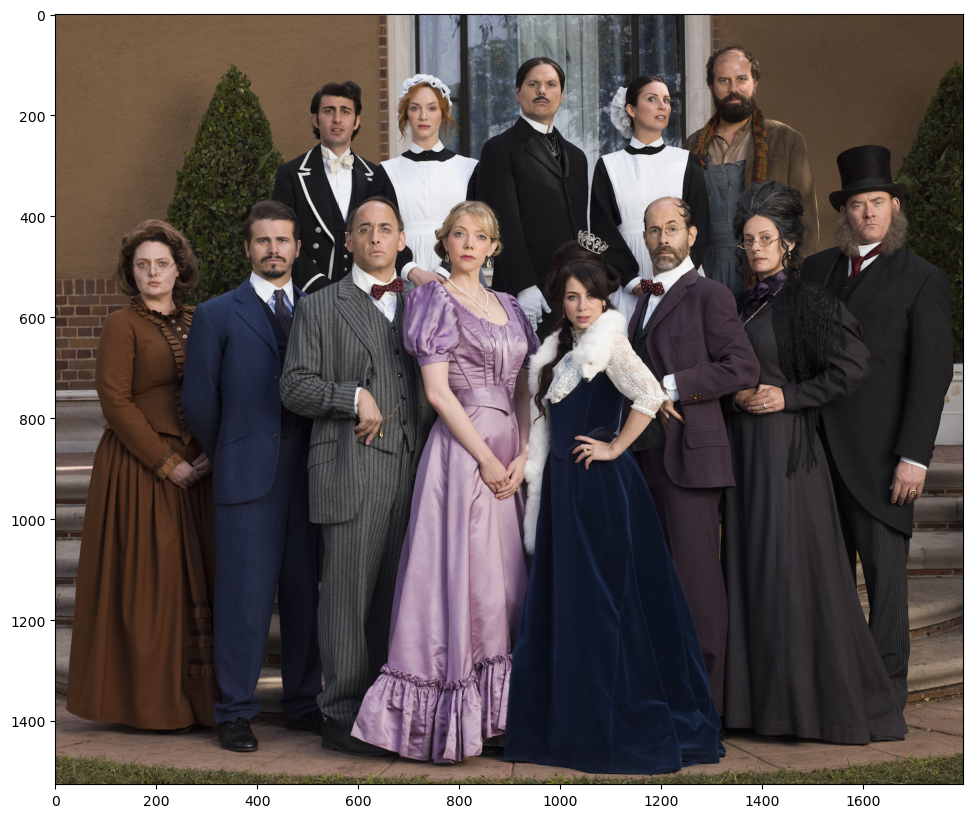

In [3]:
# load in color image
image = cv2.imread('images/multi_faces.jpg')

# Convert from BGR to RGB 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (20,10))
plt.imshow(image);

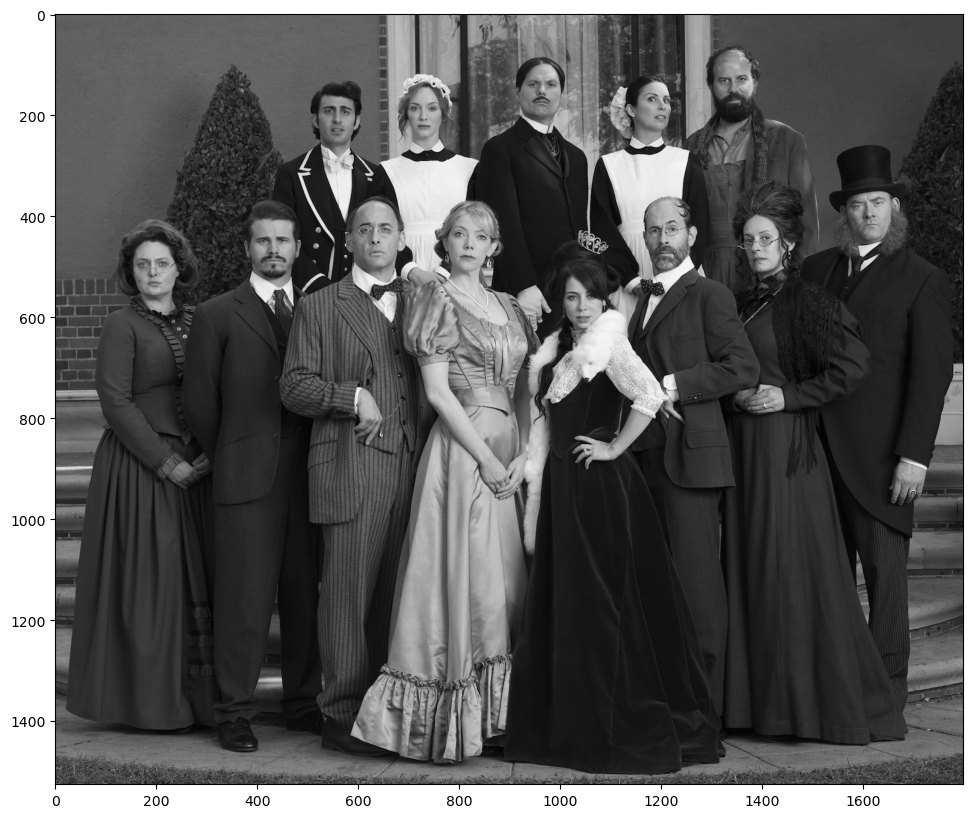

In [5]:
# Convert to grayscale 
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.figure(figsize = (20,10))
plt.imshow(gray, cmap = 'gray');

Next, the fully trained face detection model is loaded from
`detector_architectures/haarcascade_frontalface_default.xml` and applied to the input image to identify any faces present.

The number of detected faces depends on the `detectMultiScale` function, which is designed to locate faces across different scales. This function takes three inputs: `(image, scaleFactor, minNeighbors)`. Lower values for `scaleFactor` and `minNeighbors` generally result in more detections, though these may include false positives. Increasing these parameters typically leads to more reliable and precise detections. The optimal values may vary depending on the characteristics of the input image.

In [7]:
# Load in cascade classifier
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Run the detector on the grayscale image
faces = face_cascade.detectMultiScale(gray, 4, 6)

The classifier returns an array of detections, where each entry contains the coordinates defining a bounding box around a detected face. The resulting bounding boxes are always square in shape.

In [9]:
# print out the detections found
print ('Founded ' + str(len(faces)) + ' faces in this image')
print ("Their coordinates and lengths/widths are as follows")
print ('=============================')
print (faces)

Founded 13 faces in this image
Their coordinates and lengths/widths are as follows
[[ 147  459   96   96]
 [ 917  103   96   96]
 [1146  132   96   96]
 [1565  339   96   96]
 [ 684  150   96   96]
 [ 510  156   96   96]
 [1295   94   96   96]
 [ 588  390   96   96]
 [1157  390   96   96]
 [ 773  404   96   96]
 [ 383  413   96   96]
 [ 996  526   96   96]
 [1344  411   96   96]]


The detected bounding boxes are visualized on the original image to evaluate the detection results.

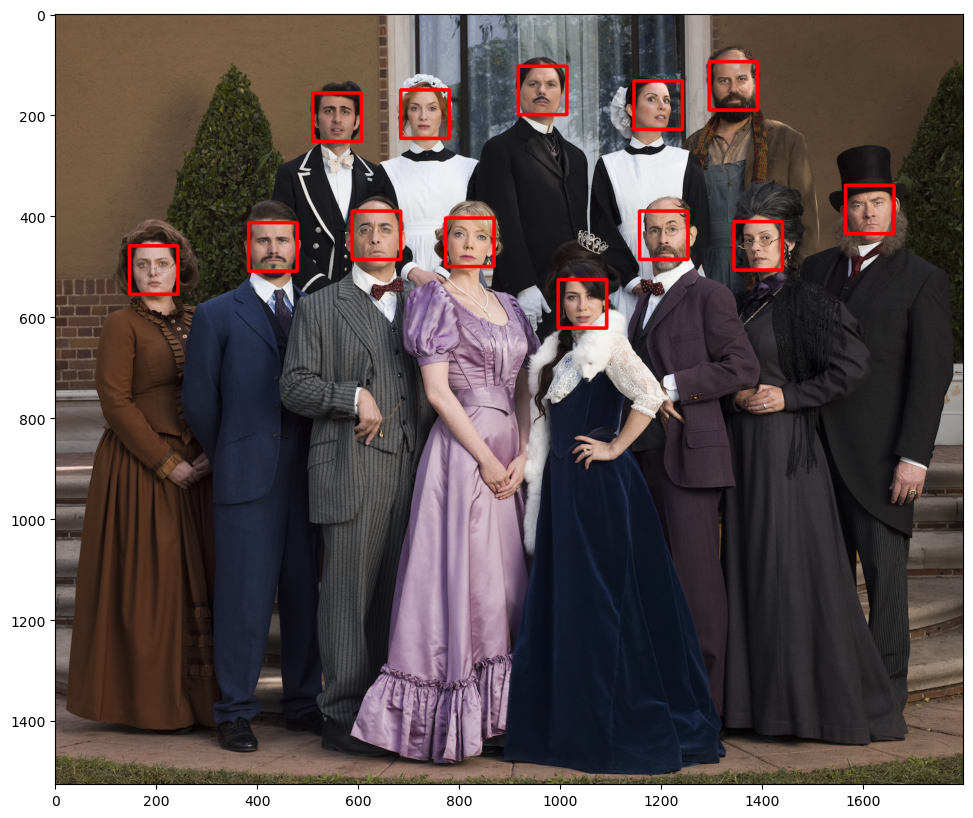

In [11]:
img_with_detections = np.copy(image)   # make a copy of the original image to plot rectangle detections ontop of

# loop over our detections and draw their corresponding boxes on top of our original image
for (x,y,w,h) in faces:
    # draw next detection as a red rectangle on top of the original image.  
    # Note: the fourth element (255,0,0) determines the color of the rectangle, 
    # and the final argument (here set to 5) determines the width of the drawn rectangle
    cv2.rectangle(img_with_detections,(x,y),(x+w,y+h),(255,0,0),5)  

# display the result
plt.figure(figsize=(20,10))
plt.imshow(img_with_detections);